# SC1015 Mini Project

---

# How does the non-football attributes of a footballer affect his wages?

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [39]:
# Basic Libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Import the Fifa Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas to impart the FIFA 19 Dataset

In [40]:
fifaData = pd.read_csv('Fifa 19.csv')
fifaData.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [57]:
fifaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18207 non-null  int64 
 1   ID           18207 non-null  int64 
 2   Name         18207 non-null  object
 3   Age          18207 non-null  int64 
 4   Photo        18207 non-null  object
 5   Nationality  18207 non-null  object
 6   Flag         18207 non-null  object
 7   Overall      18207 non-null  int64 
 8   Potential    18207 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.3+ MB


### Dropping the columns of data that cannot be used 

Firstly, we decided to drop the columns of data which contains variables that definitely cannot be used in determining wages. This is because it does not give any valuable information whatsoever.

The columns are 'ID', 'Photo', 'Flag', 'Club', 'Club Logo','Value', 'Special', 'Preferred Foot', 'Work Rate', 
               'International Reputation', 'Weak Foot', 'Position', 'Skill Moves', 'Body Type', 
               'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until' and 
               'Release Clause'
               

In [58]:
fifaData.drop(['ID', 'Photo', 'Flag', 'Club', 'Club Logo', 'Value', 'Special', 'Preferred Foot', 'Work Rate', 
               'International Reputation', 'Weak Foot', 'Position', 'Skill Moves', 'Body Type', 
               'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 
               'Release Clause'], axis = 1, inplace = True)

KeyError: "['Club' 'Club Logo' 'Value' 'Special' 'Preferred Foot' 'Work Rate'\n 'International Reputation' 'Weak Foot' 'Position' 'Skill Moves'\n 'Body Type' 'Real Face' 'Jersey Number' 'Joined' 'Loaned From'\n 'Contract Valid Until' 'Release Clause'] not found in axis"

In [59]:
fifaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18207 non-null  int64 
 1   ID           18207 non-null  int64 
 2   Name         18207 non-null  object
 3   Age          18207 non-null  int64 
 4   Photo        18207 non-null  object
 5   Nationality  18207 non-null  object
 6   Flag         18207 non-null  object
 7   Overall      18207 non-null  int64 
 8   Potential    18207 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.3+ MB


### Dropping the columns of data that are non-specific

We also decided to drop the columns of data which contains the ratings of players when placed in every position there is. This data is non-specific and cannot be used. (why can't it be used?)

A much better variable to be used is Overall, since it takes into account the average of all of the positions combined.

The columns being dropped are 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 
               'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 
               'LCB', 'CB', 'RCB', and 'RB'.

In [43]:
fifaData.drop(fifaData.iloc[:, 9:35], inplace = True, axis = 1)

In [44]:
fifaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       18207 non-null  int64  
 1   ID               18207 non-null  int64  
 2   Name             18207 non-null  object 
 3   Age              18207 non-null  int64  
 4   Photo            18207 non-null  object 
 5   Nationality      18207 non-null  object 
 6   Flag             18207 non-null  object 
 7   Overall          18207 non-null  int64  
 8   Potential        18207 non-null  int64  
 9   RW               16122 non-null  object 
 10  LAM              16122 non-null  object 
 11  CAM              16122 non-null  object 
 12  RAM              16122 non-null  object 
 13  LM               16122 non-null  object 
 14  LCM              16122 non-null  object 
 15  CM               16122 non-null  object 
 16  RCM              16122 non-null  object 
 17  RM          

### Dropping the columns of data that are football-related

Lastly, we decided to drop the specific statistics because the aim of our project is to find out how non-football statistics determine wages.


The columns being dropped are 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning' and 'GKReflexes'.

In [55]:
fifaData.drop(fifaData.iloc[:, 9:43], inplace = True, axis = 1)

In [52]:
fifaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   18207 non-null  int64  
 1   ID           18207 non-null  int64  
 2   Name         18207 non-null  object 
 3   Age          18207 non-null  int64  
 4   Photo        18207 non-null  object 
 5   Nationality  18207 non-null  object 
 6   Flag         18207 non-null  object 
 7   Overall      18207 non-null  int64  
 8   Potential    18207 non-null  int64  
 9   ShotPower    18159 non-null  float64
 10  Jumping      18159 non-null  float64
 11  Stamina      18159 non-null  float64
 12  Strength     18159 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.8+ MB


### Data Cleaning

We will now be focussing on the variables that we are most probably going to use in determining wages. But first, we would have to clean the data appropriately so that we are able to utilise them.

In [53]:
fifaData.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,ShotPower,Jumping,Stamina,Strength
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,85.0,68.0,72.0,59.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,95.0,95.0,88.0,79.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,80.0,61.0,81.0,49.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,31.0,67.0,43.0,64.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,91.0,63.0,90.0,75.0


In [48]:
#Cleaning the Wage and making it Dtype integer instead of object

fifaData['Wage'] = fifaData['Wage'].str.replace('€', '')
fifaData['Wage'] = fifaData['Wage'].str.replace('K', '').astype(int)

#Removing the rows with Wage 0
fifaData = fifaData.loc[fifaData["Wage"] != 0]

#Renaming the column from Wage to Wage (in Thousands)
fifaData = fifaData.rename(columns={'Wage': 'Wage (Thousands)'})

KeyError: 'Wage'

In [38]:
fifaData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18207 non-null  int64  
 1   ID              18207 non-null  int64  
 2   Name            18207 non-null  object 
 3   Age             18207 non-null  int64  
 4   Photo           18207 non-null  object 
 5   Nationality     18207 non-null  object 
 6   Flag            18207 non-null  object 
 7   Overall         18207 non-null  int64  
 8   Potential       18207 non-null  int64  
 9   ShotPower       18159 non-null  float64
 10  Jumping         18159 non-null  float64
 11  Stamina         18159 non-null  float64
 12  Strength        18159 non-null  float64
 13  LongShots       18159 non-null  float64
 14  Aggression      18159 non-null  float64
 15  Interceptions   18159 non-null  float64
 16  Positioning     18159 non-null  float64
 17  Vision          18159 non-null 

In [29]:
fifaData.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Wage (Thousands),Height (cm),Weight
0,0,L. Messi,31,Argentina,94,94,565,173.7,159lbs
1,1,Cristiano Ronaldo,33,Portugal,94,94,405,189.0,183lbs
2,2,Neymar Jr,26,Brazil,92,93,290,179.8,150lbs
3,3,De Gea,27,Spain,91,93,260,195.1,168lbs
4,4,K. De Bruyne,27,Belgium,91,92,355,155.8,154lbs


## Data Visualisation: Bi-Variate Statistics

### Plotting Wage against each reason on a joint plot 

In [30]:
# Extracting each Variable #

wage = pd.DataFrame(fifaData["Wage (Thousands)"])
age = pd.DataFrame(fifaData["Age"])
weight = pd.DataFrame(fifaData["Weight"])
heightCm = pd.DataFrame(fifaData["Height (cm)"])
overall = pd.DataFrame(fifaData["Overall"])
potential = pd.DataFrame(fifaData["Potential"])

In [31]:
fifaNumData = pd.DataFrame(fifaData[['Wage (Thousands)', 'Age', 'Height (cm)', 'Overall', 'Potential']])
fifaNumData.head()

,Wage (Thousands),Age,Height (cm),Overall,Potential
0,565,31,173.7,94,94
1,405,33,189.0,94,94
2,290,26,179.8,92,93
3,260,27,195.1,91,93
4,355,27,155.8,91,92


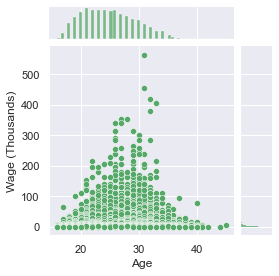

In [32]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([age, wage], axis = 1).reindex(age.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "Age", y = "Wage (Thousands)", height = 4, color = "g")

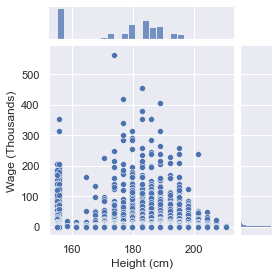

In [33]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([heightCm, wage], axis = 1).reindex(heightCm.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "Height (cm)", y = "Wage (Thousands)", height = 4, color = 'b')

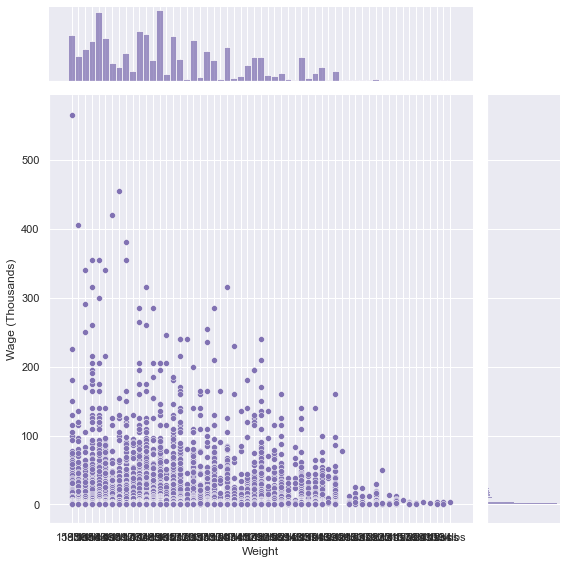

In [34]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([weight, wage], axis = 1).reindex(weight.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "Weight", y = "Wage (Thousands)", height = 8, color = "m")

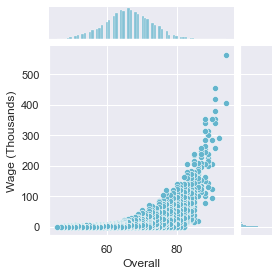

In [35]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([overall, wage], axis = 1).reindex(overall.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "Overall", y = "Wage (Thousands)", height = 4, color = "c")

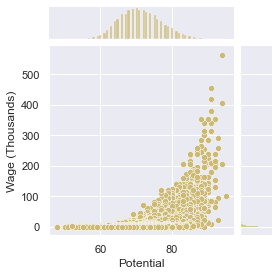

In [36]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([potential, wage], axis = 1).reindex(potential.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "Potential", y = "Wage (Thousands)", height = 4, color = 'y')

## Data Visualisation: Multi-Variate Statistics

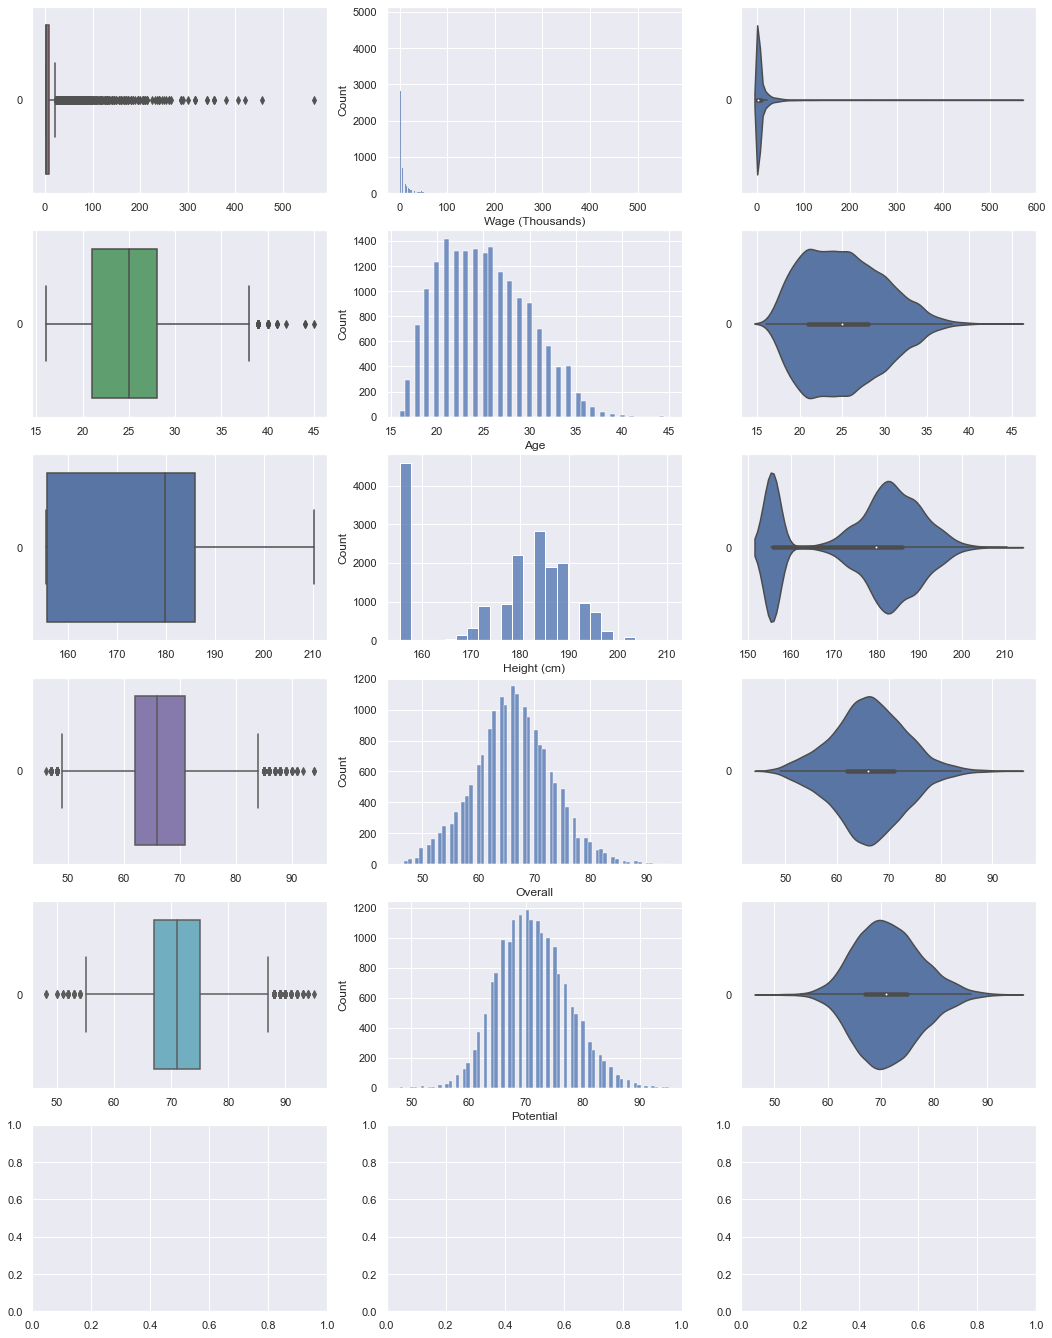

In [37]:
# Draw the distributions of all variables: Multi-variate statistics
f, axes = plt.subplots(6, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c", "y"]

count = 0
for var in fifaNumData:
    sb.boxplot(data = fifaNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data = fifaNumData[var], ax = axes[count,1])
    sb.violinplot(data = fifaNumData[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:>

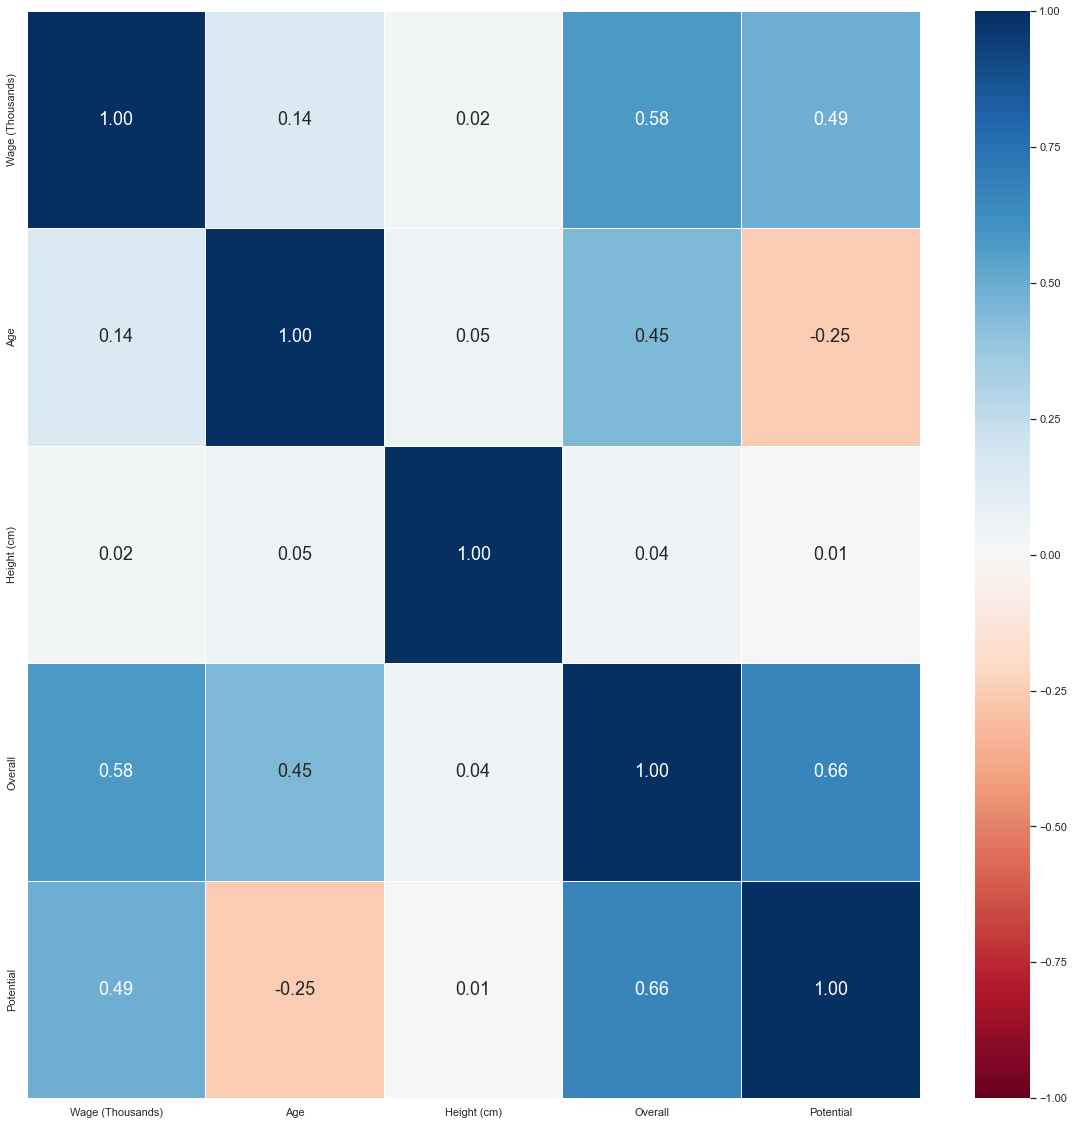

In [38]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(fifaNumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

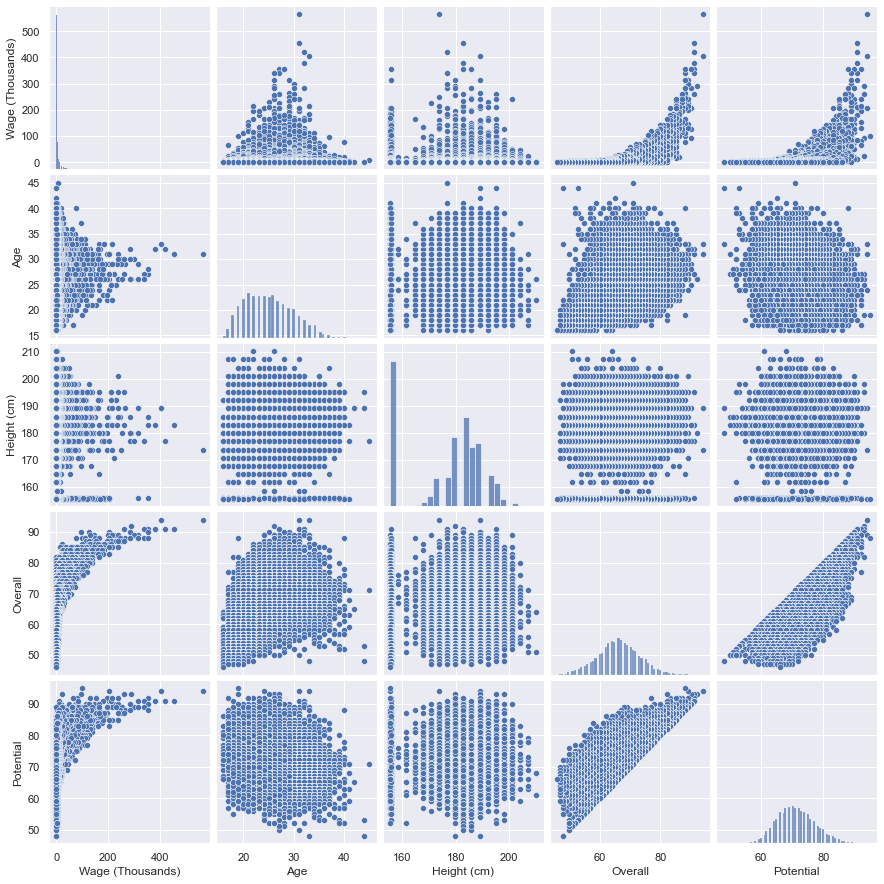

In [39]:
sb.pairplot(data = fifaNumData)

# Machine Learning Models 

## Linear Regression